# Problem 6 

In [1]:
%pylab inline

from sympy import *

Populating the interactive namespace from numpy and matplotlib


## Part a.

In [2]:
M = 10000
Ns = [2, 4, 10]
ensembles = []

for N in Ns:
    non_orthogonal_matrices = np.random.normal(size=(M, N, N))
    orthogonal_matrices = non_orthogonal_matrices + np.transpose(non_orthogonal_matrices, (0, 2, 1))
    ensembles.append(orthogonal_matrices)

In [3]:
all_eigs = []
for ensemble in ensembles:
    eigs = np.sort(np.linalg.eig(ensemble)[0], axis=1)
    all_eigs.append(eigs)

In [4]:
splits = []
for N, eigs in zip(Ns, all_eigs):
    split = eigs[:, int(N / 2) - 1] - eigs[:, int(N / 2)]
    splits.append(split)

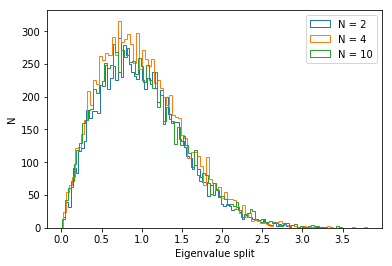

In [5]:
for N, split in zip(Ns, splits):
    hist(split / np.mean(split), 100, histtype='step', linewidth=1, label='N = {}'.format(N))
legend(loc='upper right')
xlabel('Eigenvalue split')
ylabel('N');

## Part b.

The eigenvalues, $\lambda$, can be found by calculating the determinant and setting it equal to zero:

$$
\begin{eqnarray}
\begin{vmatrix}
a - \lambda & b \\
b & c - \lambda \\
\end{vmatrix} & = & 0 \\
\lambda^2 - (a + c) \lambda + ac - b^2 & = & 0 \\
\end{eqnarray}
$$

Solving for $\lambda$ we have

$$
\lambda = \frac{1}{2} \left( a + c \pm \sqrt{(a + c)^2 - 4(ac - b^2)} \right)
$$

Now taking the difference between the two solutions to get $\Delta \lambda$,

$$
\Delta \lambda = \sqrt{(a + c)^2 - 4(ac - b^2)} = \sqrt{(a - c)^2 + 4b^2)}
$$

Letting $d \equiv (a - c) / 2$, we now have a joint distribution over two variables.  The probability of any $\Delta \lambda$ is now equal to the area in a thin annulus of radius $\Delta \lambda$ on the $d, b$ plane.  Since the area of such an annulus goes to zero as $\Delta \lambda \to 0$, the probability density at a split of zero is zero.

## Part c.

The standard deviation of $a$ is equal to 2 (since it is 2 times a Gaussian random variate with standard deviation of 1).  The standard deviation of $b$ is $\sqrt{2}$ since it is the sum of two independent random Gaussian variates.

In [6]:
np.std(ensembles[0][:, 0, 0]) - 2

0.03458734886368742

In [7]:
np.std(ensembles[0][:, 0, 1]) - np.sqrt(2)

-0.014417277992782473

The random variate $d$ has standard deviation $\sqrt{2}$:

$$
\begin{eqnarray}
\mathbb{V}[d] & = & \mathbb{V}\left[\frac{a - c}{2}\right] \\
 & = & \frac{1}{4} \left( \mathbb{V}[a] + \mathbb{V}[c] \right) \\
 & = & \frac{1}{4} (4 + 4) \\
 & = & 2 \\
\end{eqnarray}
$$

## Part d.

The CDF of $s$ is

$$
\begin{eqnarray}
F(s) & = & \int_0^s 2 \pi s \frac{1}{2 \pi \sigma^2} e^{-s^2 / 2 \sigma^2} \, ds \\
 & = & \int_0^s \frac{s}{2} e^{-s^2 / 4} \, ds \\
f(s) & = & \frac{s}{2} e^{-s^2 / 4} \\
\end{eqnarray}
$$

In [9]:
s = Symbol('s')
integrate(s**2 / 2 * exp(-s**2 / 4), (s, 0, oo))

sqrt(pi)

## Part e.

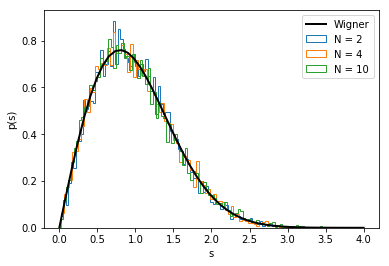

In [10]:
X = np.linspace(0, 4)
Y = np.pi * X / 2 * np.exp(-np.pi * X**2 / 4)
plt.plot(X, Y, c='k', linewidth=2, label='Wigner')

for N, split in zip(Ns, splits):
    plt.hist(split / np.mean(split), 100, normed=True, histtype='step', linewidth=1, label='N = {}'.format(N))
legend(loc='upper right')
xlabel('s')
ylabel('p(s)');

## Part f.

In [30]:
H_ensembles = []

for N in Ns:
    triu_matrices = np.triu(np.random.choice([-1, 1], size=(M, N, N)))
    sym_matrices = triu_matrices + np.transpose(np.triu(triu_matrices, k=1), (0, 2, 1))
    H_ensembles.append(sym_matrices)

In [43]:
all_H_eigs = []
for ensemble in H_ensembles:
    eigs = np.sort(np.linalg.eig(ensemble)[0], axis=1)
    all_H_eigs.append(np.real(eigs))

In [44]:
H_splits = []
for N, eigs in zip(Ns, all_H_eigs):
    split = eigs[:, int(N / 2) - 1] - eigs[:, int(N / 2)]
    H_splits.append(split)

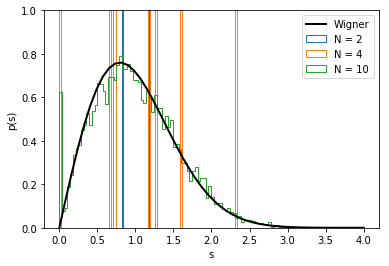

In [49]:
X = np.linspace(0, 4)
Y = np.pi * X / 2 * np.exp(-np.pi * X**2 / 4)
plt.plot(X, Y, c='k', linewidth=2, label='Wigner')

for N, split in zip(Ns, H_splits):
    plt.hist(split / np.mean(split), 100, normed=True, histtype='step', linewidth=1, label='N = {}'.format(N))
legend(loc='upper right')
xlabel('s')
ylabel('p(s)')
ylim([0, 1]);

The Wigner surmise appears to match the case of $N = 10$ quite well, but $N = 2, 4$ very poorly.

## Part g.

Consider the matrix product $H^T H$:

$$
H^T H = \begin{pmatrix}
h_{11} & h_{21} & \cdots \\
h_{12} & h_{22} & \cdots \\
\vdots & \vdots & \ddots \\
\end{pmatrix} \begin{pmatrix}
h_{11} & h_{12} & \cdots \\
h_{21} & h_{22} & \cdots \\
\vdots & \vdots & \ddots \\
\end{pmatrix}
$$

Then

$$
\begin{eqnarray}
(H^T H)_{ii} & = & \sum_j x_{ij}^2 \\
\textrm{Tr}[H^T H] & = & \sum_{i, j} x_{ij}^2 \\
\end{eqnarray}
$$

Now consider the orthogonal transformation, $H^{\prime} \equiv R^T H R$:

$$
\begin{eqnarray}
\textrm{Tr}[H^{\prime T} H^{\prime} & = & \mathrm{Tr}[R^T H^T R R^T H R] \\
 & = & \mathrm{Tr}[R^T H^T H R] \\
 & = & \mathrm{Tr}[R R^T H^T H] \\
 & = & \mathrm{Tr}[H^T H] \\
\end{eqnarray}
$$

## Part f.

Noting that $\sigma_a = \sigma_c = 2$ and $\sigma_b = \sqrt{2}$, the probability density is given by

$$
\begin{eqnarray}
\rho(H) & = & \rho(a, b, c) \\
 & = & \left( \frac{1}{\sqrt{2 \pi} \sigma_a^2} e^{-a^2 / (2 \sigma_a^2)} \right)
       \left( \frac{1}{\sqrt{2 \pi} \sigma_b^2} e^{-b^2 / (2 \sigma_b^2)} \right)
       \left( \frac{1}{\sqrt{2 \pi} \sigma_c^2} e^{-c^2 / (2 \sigma_c^2)} \right) \\
 & = & \frac{e^{-(a^2 + 2b^2 + c^2) / 8}}{32 (2 \pi)^{3/2}} \\
 & = & \frac{e^{-\textrm{Tr}[H^T H] / 8}}{32 (2 \pi)^{3/2}}
\end{eqnarray}
$$

Since $\mathrm{Tr}[H^T H]$ is invariant to orthogonal transformations and $\rho(H)$ only depends on $\mathrm{Tr}[H^T H]$, $\rho(H)$ must be invariant to orthogonal transformations as well.